Firstly here we got the data from stratastracth on which we have to build a predictive model to predict the delivery duration of food items.
1. Get the data
2. We need to import all the necessary libraries
3. Explore and clean the data
4. Feature selection
5. feature extraction
6. split the data and build a model on training data
7. test the model
8. deploy the model and communicate the results

We Have to Build a model to predict the total delivery duration in seconds for DoorDash, It is very important for DoorDash to get this right, as it has a big impact on consumer experience. In this project we will build a model to predict the estimated time taken for a delivery.

We have the historical data from DoorDash and following are the features of our dataset:

**Start:** the time consumer submits the order (created_at)

**End:** when the order will be delivered to the consumer   (actual_delivery_time)

**market_id:** A city/region in which DoorDash operates, e.g., Los Angeles, given in the data as an id

**created_at:** Timestamp in UTC when the order was submitted by the consumer to DoorDash. (Note this timestamp is in UTC, but in case you need it, the actual timezone of the region was US/Pacific)

**actual_delivery_time:** Timestamp in UTC when the order was delivered to the consumer

**store_id:** an id representing the restaurant the order was submitted for

**store_primary_category:** cuisine category of the restaurant, e.g., italian, asian

**order_protocol:** a store can receive orders from DoorDash through many modes. This field represents an id denoting the protocol

**total_items:** total number of items in the order

**subtotal:** total value of the order submitted (in cents)

**num_distinct_items:** number of distinct items included in the order

**min_item_price:** price of the item with the least cost in the order (in cents)

**max_item_price:** price of the item with the highest cost in the order (in cents)

**total_onshift_dashers:** Number of available dashers who are within 10 miles of the store at the time of order creation

**total_busy_dashers:** Subset of above total_onshift_dashers who are currently working on an order

**total_outstanding_orders:** Number of orders within 10 miles of this order that are currently being processed.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("historical_data.csv")

In [3]:
df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 16 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   market_id                                     196441 non-null  float64
 1   created_at                                    197428 non-null  object 
 2   actual_delivery_time                          197421 non-null  object 
 3   store_id                                      197428 non-null  int64  
 4   store_primary_category                        192668 non-null  object 
 5   order_protocol                                196433 non-null  float64
 6   total_items                                   197428 non-null  int64  
 7   subtotal                                      197428 non-null  int64  
 8   num_distinct_items                            197428 non-null  int64  
 9   min_item_price                                19

In [5]:
df.shape

(197428, 16)

Here We can see that the two main columns for our prediction i.e. created at and actual_delivery_time has object data type
so we firstly need to convert that to date time and create our target feature which is delivery time = actual_delivery_time - created_at

In [6]:
df['created_at']=pd.to_datetime(df['created_at'])
df['actual_delivery_time']=pd.to_datetime(df['actual_delivery_time'])

In [7]:
df['created_at'].dtype

dtype('<M8[ns]')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 16 columns):
 #   Column                                        Non-Null Count   Dtype         
---  ------                                        --------------   -----         
 0   market_id                                     196441 non-null  float64       
 1   created_at                                    197428 non-null  datetime64[ns]
 2   actual_delivery_time                          197421 non-null  datetime64[ns]
 3   store_id                                      197428 non-null  int64         
 4   store_primary_category                        192668 non-null  object        
 5   order_protocol                                196433 non-null  float64       
 6   total_items                                   197428 non-null  int64         
 7   subtotal                                      197428 non-null  int64         
 8   num_distinct_items                            197428 n

Now we have to create our target variable which is delivery_time=actual_delivery_time-created_at

In [9]:
df['actual_delivery']=df['actual_delivery_time']-df['created_at']

In [10]:
df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,actual_delivery
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0,0 days 01:02:59
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0,0 days 01:07:04
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0,0 days 00:29:41
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0,0 days 00:51:15
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0,0 days 00:39:50


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 17 columns):
 #   Column                                        Non-Null Count   Dtype          
---  ------                                        --------------   -----          
 0   market_id                                     196441 non-null  float64        
 1   created_at                                    197428 non-null  datetime64[ns] 
 2   actual_delivery_time                          197421 non-null  datetime64[ns] 
 3   store_id                                      197428 non-null  int64          
 4   store_primary_category                        192668 non-null  object         
 5   order_protocol                                196433 non-null  float64        
 6   total_items                                   197428 non-null  int64          
 7   subtotal                                      197428 non-null  int64          
 8   num_distinct_items                          

In [12]:
from datetime import datetime

In [13]:
df['actual_delivery']=df['actual_delivery'].astype('timedelta64[s]')

In [14]:
df.describe()

,market_id,store_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,actual_delivery
count,196441.000000,197428.000000,196433.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,181166.000000,181166.000000,181166.000000,197428.000000,196902.000000,1.974210e+05
mean,2.978706,3530.510272,2.882352,3.196391,2682.331402,2.670791,686.218470,1159.588630,44.808093,41.739747,58.050065,308.560179,545.358935,2.908257e+03
std,1.524867,2053.496711,1.503771,2.666546,1823.093688,1.630255,522.038648,558.411377,34.526783,32.145733,52.661830,90.139653,219.352902,1.922961e+04
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,-86.000000,0.000000,-4.000000,-5.000000,-6.000000,0.000000,0.000000,1.010000e+02
25%,2.000000,1686.000000,1.000000,2.000000,1400.000000,1.000000,299.000000,800.000000,17.000000,15.000000,17.000000,251.000000,382.000000,2.104000e+03
50%,3.000000,3592.000000,3.000000,3.000000,2200.000000,2.000000,595.000000,1095.000000,37.000000,34.000000,41.000000,251.000000,544.000000,2.660000e+03
75%,4.000000,5299.000000,4.000000,4.000000,3395.000000,3.000000,949.000000,1395.000000,65.000000,62.000000,85.000000,446.000000,702.000000,3.381000e+03
max,6.000000,6987.000000,7.000000,411.000000,27100.000000,20.000000,14700.000000,14700.000000,171.000000,154.000000,285.000000,2715.000000,2088.000000,8.516859e+06


total_onshift_dashers are the Number of available dashers who are within 10 miles of the store at the time of order creation
and they all may not be available at the time of delivery.
    so we create a new feature called "busy dasher ratio %" = total_busy_dashers/total_onshift_dashers

In [16]:
df[df['total_onshift_dashers']<=0].count()

market_id                                       3619
created_at                                      3636
actual_delivery_time                            3636
store_id                                        3636
store_primary_category                          3582
order_protocol                                  3623
total_items                                     3636
subtotal                                        3636
num_distinct_items                              3636
min_item_price                                  3636
max_item_price                                  3636
total_onshift_dashers                           3636
total_busy_dashers                              3636
total_outstanding_orders                        3636
estimated_order_place_duration                  3636
estimated_store_to_consumer_driving_duration    3628
actual_delivery                                 3636
dtype: int64

In [17]:
#df['total_onshift_dashers'].replace(0 ,np.nan,inplace=True)

higher the busy dahsers ratio lesser the dasher capacity so more time will be taker by door dash to deliver the food

In [43]:
df['busy_dasher_ratio']=df['total_busy_dashers']/df['total_onshift_dashers']

estimated_order_place_duration  + estimated_store_to_consumer_driving_duration + food_prep = actual_delivery

In [44]:
df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,actual_delivery,non_prep_time,nan_free_store_prim_cat,busy_dasher_ratio
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0,3779.0,1307.0,american,0.424242
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0,4024.0,1136.0,indian,2.000000
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0,1781.0,1136.0,indian,0.000000
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0,3075.0,735.0,indian,1.000000
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0,2390.0,1096.0,indian,1.000000


In [45]:
df['non_prep_time']=df['estimated_store_to_consumer_driving_duration'] + df['estimated_order_place_duration']

In [21]:
#df['food_prep_time']=df['actual_delivery'] - df['non_prep_time']

In [72]:
df['market_id'].nunique()

6

In [47]:
df['order_protocol'].nunique()

7

In [48]:
df['store_id'].nunique()

6743

One hot encoding market_id and store_id 

In [49]:
order_protocol_dummies=pd.get_dummies(df.order_protocol)
order_protocol_dummies=order_protocol_dummies.add_prefix('order_protocol_')

In [50]:
order_protocol_dummies.head(3)

,order_protocol_1.0,order_protocol_2.0,order_protocol_3.0,order_protocol_4.0,order_protocol_5.0,order_protocol_6.0,order_protocol_7.0
0,1,0,0,0,0,0,0
1,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0


In [51]:
market_id_dummies=pd.get_dummies(df.market_id)
market_id_dummies=market_id_dummies.add_prefix('market_id_')
market_id_dummies.head(3)

,market_id_1.0,market_id_2.0,market_id_3.0,market_id_4.0,market_id_5.0,market_id_6.0
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,1,0,0,0


In [52]:
df['store_primary_category'].isna().sum()

4760

here we can fill up these null values by most frequent category by store_id and then we can one hot encode to use for modeling

In [53]:
df['store_id'].nunique()

6743

In [54]:
df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,actual_delivery,non_prep_time,nan_free_store_prim_cat,busy_dasher_ratio
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0,3779.0,1307.0,american,0.424242
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0,4024.0,1136.0,indian,2.000000
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0,1781.0,1136.0,indian,0.000000
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0,3075.0,735.0,indian,1.000000
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0,2390.0,1096.0,indian,1.000000


In [55]:
store_id_unique = df['store_id'].unique().tolist()
len(store_id_unique)

6743

In [56]:
store_id_unique = df['store_id'].unique().tolist()
store_id_and_category={store_id: df[df.store_id==store_id].store_primary_category.mode()
                        for store_id in store_id_unique}

In [57]:
len(store_id_and_category)

6743

In [58]:
def fill(store_id):
    try:
        return store_id_and_category[store_id].values[0]
    except:
        return np.nan
df['nan_free_store_prim_cat']=df.store_id.apply(fill)

In [59]:
df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,actual_delivery,non_prep_time,nan_free_store_prim_cat,busy_dasher_ratio
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0,3779.0,1307.0,american,0.424242
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0,4024.0,1136.0,indian,2.000000
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0,1781.0,1136.0,indian,0.000000
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0,3075.0,735.0,indian,1.000000
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0,2390.0,1096.0,indian,1.000000


In [60]:
df['store_primary_category'].nunique()

74

create dummies for store primary cat

In [61]:
store_primary_category_dummies=pd.get_dummies(df.nan_free_store_prim_cat)
store_primary_category_dummies=store_primary_category_dummies.add_prefix('category_')
store_primary_category_dummies.head(3)

,category_afghan,category_african,category_alcohol,category_alcohol-plus-food,category_american,category_argentine,category_asian,category_barbecue,category_belgian,category_brazilian,...,category_southern,category_spanish,category_steak,category_sushi,category_tapas,category_thai,category_turkish,category_vegan,category_vegetarian,category_vietnamese
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


NOw drop some unnecessary columns 

In [62]:
df1=df.drop(columns=['created_at','market_id','store_id','store_primary_category','actual_delivery_time',
                     'nan_free_store_prim_cat'])
df1.head()

,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,actual_delivery,non_prep_time,busy_dasher_ratio
0,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0,3779.0,1307.0,0.424242
1,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0,4024.0,1136.0,2.000000
2,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0,1781.0,1136.0,0.000000
3,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0,3075.0,735.0,1.000000
4,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0,2390.0,1096.0,1.000000


In [63]:
train_df=pd.concat([df1,order_protocol_dummies,market_id_dummies,store_primary_category_dummies],axis=1)

In [64]:
train_df.head(3)

,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,...,category_southern,category_spanish,category_steak,category_sushi,category_tapas,category_thai,category_turkish,category_vegan,category_vegetarian,category_vietnamese
0,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,...,0,0,0,0,0,0,0,0,0,0
1,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,...,0,0,0,0,0,0,0,0,0,0
2,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,...,0,0,0,0,0,0,0,0,0,0


In [65]:
train_df=train_df.astype('float32')
train_df.head(3)

,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,...,category_southern,category_spanish,category_steak,category_sushi,category_tapas,category_thai,category_turkish,category_vegan,category_vegetarian,category_vietnamese
0,1.0,4.0,3441.0,4.0,557.0,1239.0,33.0,14.0,21.0,446.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,1.0,1900.0,1.0,1400.0,1400.0,1.0,2.0,2.0,446.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,1900.0,1.0,1900.0,1900.0,1.0,0.0,0.0,446.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [66]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Columns: 101 entries, order_protocol to category_vietnamese
dtypes: float32(101)
memory usage: 76.1 MB


In [67]:
train_df.describe()

,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,...,category_southern,category_spanish,category_steak,category_sushi,category_tapas,category_thai,category_turkish,category_vegan,category_vegetarian,category_vietnamese
count,196433.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,181166.000000,181166.000000,181166.000000,197428.000000,...,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000
mean,2.882352,3.196391,2682.331543,2.670791,686.218506,1159.588623,44.808094,41.739746,58.050064,308.560181,...,0.000815,0.000187,0.005465,0.011300,0.000740,0.037254,0.001175,0.001433,0.004234,0.030928
std,1.503763,2.665833,1822.968994,1.629398,522.068542,558.358337,34.524193,32.146065,52.657368,90.211159,...,0.028535,0.013687,0.073625,0.105705,0.027175,0.189502,0.034246,0.037816,0.064904,0.173167
min,1.000000,1.000000,0.000000,1.000000,-86.000000,0.000000,-4.000000,-5.000000,-6.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,1400.000000,1.000000,299.000000,800.000000,17.000000,15.000000,17.000000,251.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,3.000000,2200.000000,2.000000,595.000000,1095.000000,37.000000,34.000000,41.000000,251.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,4.000000,3395.000000,3.000000,949.000000,1395.000000,65.000000,62.000000,85.000000,446.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,7.000000,411.000000,27100.000000,20.000000,14700.000000,14700.000000,171.000000,154.000000,285.000000,2715.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [68]:
train_df['busy_dasher_ratio'].describe()

count    1.775900e+05
mean              NaN
std               NaN
min              -inf
25%      8.269231e-01
50%      9.622642e-01
75%      1.000000e+00
max               inf
Name: busy_dasher_ratio, dtype: float64

In [69]:
np.where(np.any(~np.isfinite(train_df),axis=0)==True)

(array([ 0,  6,  7,  8, 10, 11, 12, 13], dtype=int64),)

In [70]:
train_df.replace([np.inf,-np.inf],np.nan,inplace=True)
train_df.dropna(inplace=True)

In [71]:
train_df.shape

(176166, 101)

,Lets check for collinearity(the variables might be corelated with each other/they have the same effect on model) here
1. correlation matrix: a visual representation containing the correlation coefficients between the variables in your dataframe
we will use the 'corr' method to create data showing correlation

In [73]:
corr=train_df.corr()
#generating a mask for upper triangle
mask=np.triu(np.ones_like(corr,dtype=bool))

<Axes: >

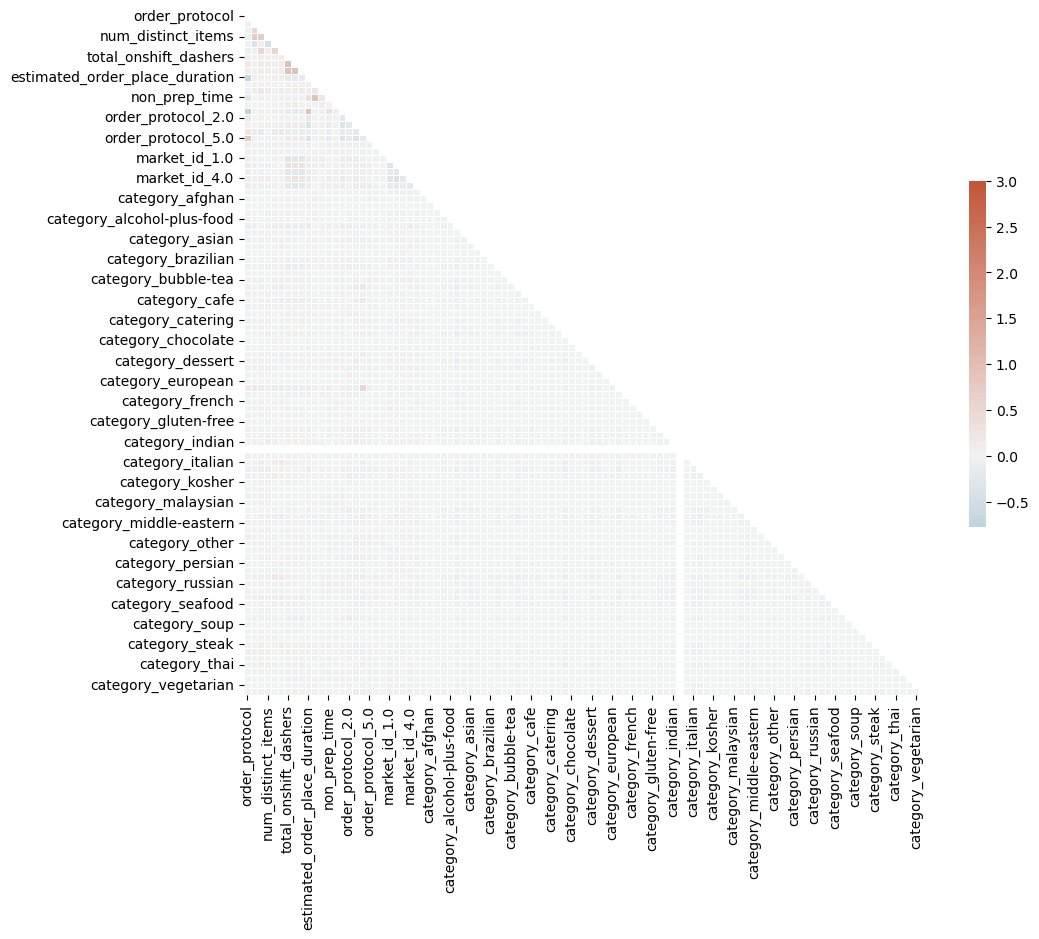

In [74]:
#setting up a matplolib fig
f,ax = plt.subplots(figsize=(11,9))
#generating a custome diverging cmap
cmap=sns.diverging_palette(230,20,as_cmap=True)
#drawing a heatmap with the mask
sns.heatmap(corr,mask=mask,cmap=cmap,vmax=3,center=0,
           square=True,linewidth=.5,cbar_kws={"shrink": .5})

In [75]:
train_df['category_indonesian'].describe()

count    176166.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: category_indonesian, dtype: float64

In [76]:
train_df.shape

(176166, 101)

In [77]:
def get_redundant_feature(df):
    pairs_to_drop=set()
    cols=df.columns
    for i in range(0,df.shape[1]):
        for j in range(0,i+1):
            pairs_to_drop.add((cols[i],cols[j]))
    return pairs_to_drop

In [78]:
def get_top_corr(df, n=5):
    au_corr=df.corr().abs().unstack()
    labels_to_drop=get_redundant_feature(df)
    au_corr=au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

In [79]:
print("topabsolute correlation")
print(get_top_corr(train_df,20))

topabsolute correlation
total_onshift_dashers                         total_busy_dashers                0.941755
                                              total_outstanding_orders          0.934653
total_busy_dashers                            total_outstanding_orders          0.931312
estimated_store_to_consumer_driving_duration  non_prep_time                     0.923067
estimated_order_place_duration                order_protocol_1.0                0.900654
order_protocol                                order_protocol_1.0                0.780826
                                              order_protocol_5.0                0.768999
total_items                                   num_distinct_items                0.757858
order_protocol                                estimated_order_place_duration    0.687007
subtotal                                      num_distinct_items                0.682964
total_items                                   subtotal                          0.5568

From above observations we can drop cretated_at, market_id,store_id,store_primary_category,actual_delivery_time,order_protocol


In [80]:
df.columns

Index(['market_id', 'created_at', 'actual_delivery_time', 'store_id',
       'store_primary_category', 'order_protocol', 'total_items', 'subtotal',
       'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'estimated_order_place_duration',
       'estimated_store_to_consumer_driving_duration', 'actual_delivery',
       'non_prep_time', 'nan_free_store_prim_cat', 'busy_dasher_ratio'],
      dtype='object')

In [81]:
train_df=df.drop(columns = ['created_at' , 'market_id' , 'store_id' , 'store_primary_category',
                          'actual_delivery_time','order_protocol','nan_free_store_prim_cat'])

In [82]:
# we will conact the one hot encoded columns but not market id as is is hhighy corelated
train_df=pd.concat([train_df,order_protocol_dummies,store_primary_category_dummies],axis=1)

In [83]:
#now we will drop other highly corelated columns
train_df=train_df.drop(columns=['total_busy_dashers','total_onshift_dashers','category_indonesian',
                                'non_prep_time'])

In [84]:
train_df=train_df.astype('float32')
train_df.replace([np.inf,-np.inf], np.nan, inplace=True)
train_df.dropna(inplace=True)
train_df.head()

,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,actual_delivery,busy_dasher_ratio,...,category_southern,category_spanish,category_steak,category_sushi,category_tapas,category_thai,category_turkish,category_vegan,category_vegetarian,category_vietnamese
0,4.0,3441.0,4.0,557.0,1239.0,21.0,446.0,861.0,3779.0,0.424242,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1900.0,1.0,1400.0,1400.0,2.0,446.0,690.0,4024.0,2.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1900.0,1.0,1900.0,1900.0,0.0,446.0,690.0,1781.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6.0,6900.0,5.0,600.0,1800.0,2.0,446.0,289.0,3075.0,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.0,3900.0,3.0,1100.0,1600.0,9.0,446.0,650.0,2390.0,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [85]:
train_df.shape

(177070, 90)

In [86]:
def get_top_corr(df, n=5):
    au_corr=df.corr().abs().unstack()
    labels_to_drop=get_redundant_feature(df)
    au_corr=au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("topabsolute correlation")
print(get_top_corr(train_df,20))

topabsolute correlation
estimated_order_place_duration  order_protocol_1.0    0.897645
total_items                     num_distinct_items    0.758146
subtotal                        num_distinct_items    0.682890
total_items                     subtotal              0.557175
min_item_price                  max_item_price        0.541241
subtotal                        max_item_price        0.507947
order_protocol_4.0              category_fast         0.489946
num_distinct_items              min_item_price        0.446733
total_items                     min_item_price        0.389277
order_protocol_1.0              order_protocol_3.0    0.373581
estimated_order_place_duration  order_protocol_3.0    0.364170
order_protocol_1.0              order_protocol_5.0    0.342345
estimated_order_place_duration  order_protocol_5.0    0.333291
order_protocol_3.0              order_protocol_5.0    0.332533
order_protocol_1.0              order_protocol_2.0    0.226903
estimated_order_place_duration 

We can see that order protocol is coredlated with columns so we will not concat that part in code and we will also drop 'food_prep_time'

In [87]:
train_df=df.drop(columns = ['created_at' , 'market_id' , 'store_id' , 'store_primary_category',
                          'actual_delivery_time','order_protocol','nan_free_store_prim_cat'])

# we will conact the one hot encoded columns but not market id as is is hhighy corelated
train_df=pd.concat([train_df,store_primary_category_dummies],axis=1)

#now we will drop other highly corelated columns
train_df=train_df.drop(columns=['total_busy_dashers','total_onshift_dashers','category_indonesian',
                                'non_prep_time'])

train_df=train_df.astype('float32')
train_df.replace([np.inf,-np.inf], np.nan, inplace=True)
train_df.dropna(inplace=True)
train_df.head()

,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,actual_delivery,busy_dasher_ratio,...,category_southern,category_spanish,category_steak,category_sushi,category_tapas,category_thai,category_turkish,category_vegan,category_vegetarian,category_vietnamese
0,4.0,3441.0,4.0,557.0,1239.0,21.0,446.0,861.0,3779.0,0.424242,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1900.0,1.0,1400.0,1400.0,2.0,446.0,690.0,4024.0,2.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1900.0,1.0,1900.0,1900.0,0.0,446.0,690.0,1781.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6.0,6900.0,5.0,600.0,1800.0,2.0,446.0,289.0,3075.0,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.0,3900.0,3.0,1100.0,1600.0,9.0,446.0,650.0,2390.0,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [88]:
print("topabsolute correlation")
print(get_top_corr(train_df,20))

topabsolute correlation
total_items                                   num_distinct_items                0.758146
subtotal                                      num_distinct_items                0.682890
total_items                                   subtotal                          0.557175
min_item_price                                max_item_price                    0.541241
subtotal                                      max_item_price                    0.507947
num_distinct_items                            min_item_price                    0.446733
total_items                                   min_item_price                    0.389277
estimated_store_to_consumer_driving_duration  actual_delivery                   0.188418
subtotal                                      actual_delivery                   0.172312
total_outstanding_orders                      estimated_order_place_duration    0.171049
total_items                                   category_fast                     0.1709

In [89]:
train_df.shape

(177070, 83)

Lets try and some new featurs which might help us modeling

In [90]:
train_df['percent_distinct_item_of_total']=train_df['num_distinct_items']/train_df['total_items']
train_df['avg_price_per_item']=train_df['subtotal']/train_df['total_items']
train_df.drop(columns=['num_distinct_items','subtotal'],inplace=True)

print("top absolute correlation")
print(get_top_corr(train_df,20))

top absolute correlation
min_item_price                                avg_price_per_item                0.860580
max_item_price                                avg_price_per_item                0.770382
min_item_price                                max_item_price                    0.541241
total_items                                   percent_distinct_item_of_total    0.445751
                                              min_item_price                    0.389277
                                              avg_price_per_item                0.310759
percent_distinct_item_of_total                avg_price_per_item                0.226711
category_pizza                                avg_price_per_item                0.225510
estimated_store_to_consumer_driving_duration  actual_delivery                   0.188418
max_item_price                                percent_distinct_item_of_total    0.178021
category_fast                                 avg_price_per_item                0.175

In [91]:
train_df['price_range_of_items']=train_df['max_item_price']-train_df['min_item_price']
train_df.drop(columns=['max_item_price','min_item_price'],inplace=True)

print("topabsolute correlation")
print(get_top_corr(train_df,20))

topabsolute correlation
total_items                                   percent_distinct_item_of_total    0.445751
                                              price_range_of_items              0.333304
                                              avg_price_per_item                0.310759
percent_distinct_item_of_total                avg_price_per_item                0.226711
category_pizza                                avg_price_per_item                0.225510
estimated_store_to_consumer_driving_duration  actual_delivery                   0.188418
category_fast                                 avg_price_per_item                0.175950
total_outstanding_orders                      estimated_order_place_duration    0.171049
total_items                                   category_fast                     0.170988
category_italian                              avg_price_per_item                0.158193
total_outstanding_orders                      actual_delivery                   0.1576

In [92]:
train_df.shape

(177070, 82)

Lets check for multicollinearity(when one predictor variable in a multiple regression model can be predicted from the other variables)

Identifying multicollinearity in a multiple regression problem involves analyzing the relationships between the predictor variables (features) in the regression model. Here are a few common methods to identify multicollinearity:

1. Correlation Matrix: Calculate the correlation matrix between the predictor variables. High correlation coefficients (close to 1 or -1) indicate potential multicollinearity. A correlation matrix can be obtained using the `corr()` method in pandas or by using the `numpy.corrcoef()` function.

2. Variance Inflation Factor (VIF): Calculate the VIF for each predictor variable. VIF measures the extent to which the variance of the estimated regression coefficients is increased due to multicollinearity. High VIF values (typically above 5 or 10) indicate multicollinearity. The VIF for a predictor variable can be calculated as 1 / (1 - R^2), where R^2 is the coefficient of determination obtained from regressing that predictor variable against all the other predictor variables.

3. Eigenvalues and Condition Number: Compute the eigenvalues of the correlation matrix or the determinant of the matrix. If there are eigenvalues close to zero or the determinant is close to zero, it suggests multicollinearity. The condition number, which is the ratio of the largest eigenvalue to the smallest eigenvalue, is also used to identify multicollinearity. A large condition number (typically above 30) indicates multicollinearity.

4. Tolerance and Variance Proportions: Calculate the tolerance and variance proportions for each predictor variable. Tolerance is the inverse of the VIF, and values close to 1 indicate low multicollinearity. Variance proportions represent the proportion of variance explained by each predictor variable in a multiple regression model. If a predictor variable has a small variance proportion, it suggests multicollinearity.

It's important to note that multicollinearity is a problem when it significantly affects the interpretation and stability of the regression coefficients. Depending on the severity of multicollinearity, you may need to take actions such as removing redundant variables, transforming variables, or using dimensionality reduction techniques like principal component analysis (PCA) to mitigate its impact on the regression model.

In [93]:
train_df.shape

(177070, 82)

In [94]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [95]:
def comput_vif(features):
    vif_data=pd.DataFrame()
    vif_data['features']=features
    vif_data['VIF']=[variance_inflation_factor(train_df[features].values,i) for i in range (len(features))]
    return vif_data.sort_values(by=['VIF']).reset_index(drop=True)

In [96]:
train_df.columns

Index(['total_items', 'total_outstanding_orders',
       'estimated_order_place_duration',
       'estimated_store_to_consumer_driving_duration', 'actual_delivery',
       'busy_dasher_ratio', 'category_afghan', 'category_african',
       'category_alcohol', 'category_alcohol-plus-food', 'category_american',
       'category_argentine', 'category_asian', 'category_barbecue',
       'category_belgian', 'category_brazilian', 'category_breakfast',
       'category_british', 'category_bubble-tea', 'category_burger',
       'category_burmese', 'category_cafe', 'category_cajun',
       'category_caribbean', 'category_catering', 'category_cheese',
       'category_chinese', 'category_chocolate', 'category_comfort-food',
       'category_convenience-store', 'category_dessert', 'category_dim-sum',
       'category_ethiopian', 'category_european', 'category_fast',
       'category_filipino', 'category_french', 'category_gastropub',
       'category_german', 'category_gluten-free', 'category_gree

In [98]:
#lets apply above funt
features=train_df.drop(columns=['actual_delivery']).columns.to_list()
vif_data=comput_vif(features)
vif_data

,features,VIF
0,category_alcohol-plus-food,1.000370
1,category_chocolate,1.000489
2,category_belgian,1.000749
3,category_russian,1.003226
4,category_african,1.003820
...,...,...
76,busy_dasher_ratio,6.369592
77,category_american,7.033601
78,estimated_store_to_consumer_driving_duration,7.210810
79,estimated_order_place_duration,13.472033


In [99]:
multicollinearity = True

while multicollinearity:
    highest_vif_feature = vif_data['features'].values.tolist()[-1]
    print('I will remove:', highest_vif_feature)
    
    if highest_vif_feature in features:
        features.remove(highest_vif_feature)
    
    vif_data = comput_vif(features)
    multicollinearity = len(vif_data[vif_data.VIF > 20]) != 0

selected_features = vif_data['features'].values.tolist()
vif_data

I will remove: percent_distinct_item_of_total


,features,VIF
0,category_alcohol-plus-food,1.000222
1,category_chocolate,1.000362
2,category_belgian,1.000451
3,category_russian,1.002016
4,category_gluten-free,1.002364
...,...,...
75,category_american,4.505927
76,avg_price_per_item,5.958957
77,busy_dasher_ratio,6.357882
78,estimated_store_to_consumer_driving_duration,7.192609


In [100]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X = train_df[selected_features]
y = train_df['actual_delivery']
X_train, X_test , y_train, y_test = train_test_split(X, y , test_size=0.2, random_state=42)

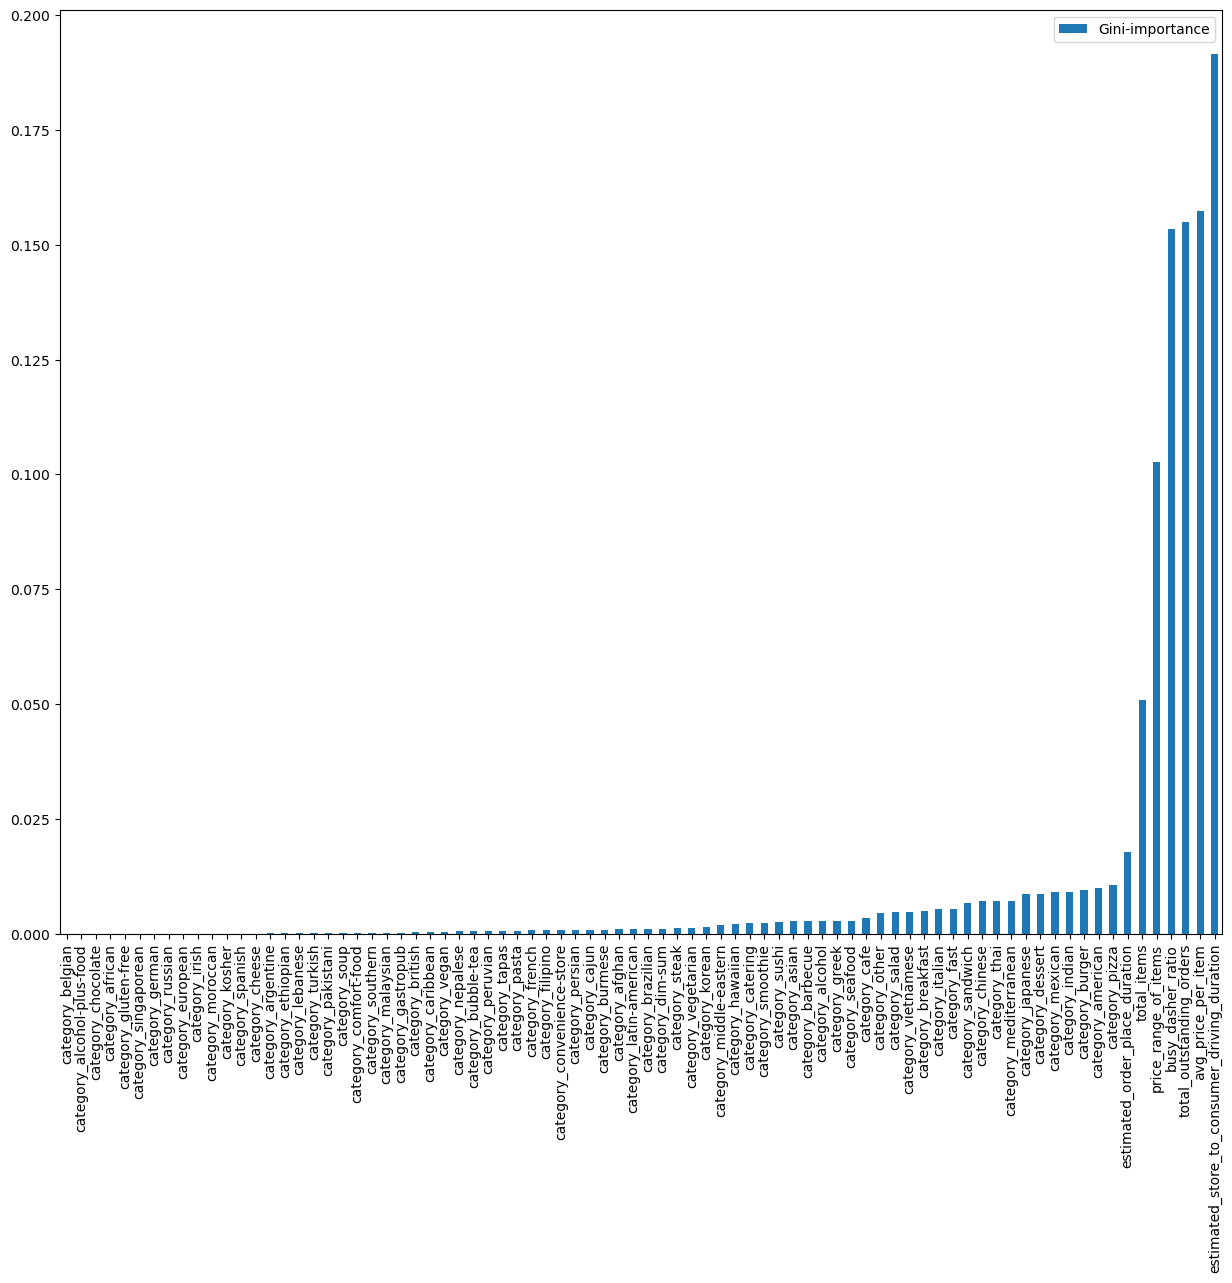

In [101]:
feature_names = [f"feature {i}" for i in range((X.shape[1]))]
forest = RandomForestRegressor(random_state=42)
forest.fit(X_train, y_train)
feats = {}
for feature, importance in zip(X.columns, forest.feature_importances_):
    feats[feature] = importance
importances = pd.DataFrame.from_dict(feats,orient='index').rename(columns={0:'Gini-importance'})
importances.sort_values(by='Gini-importance').plot(kind='bar',rot=90,figsize=(15,12))
plt.show()

In [102]:
importances.sort_values(by='Gini-importance')[-35:].index.tolist()

['category_middle-eastern',
 'category_hawaiian',
 'category_catering',
 'category_smoothie',
 'category_sushi',
 'category_asian',
 'category_barbecue',
 'category_alcohol',
 'category_greek',
 'category_seafood',
 'category_cafe',
 'category_other',
 'category_salad',
 'category_vietnamese',
 'category_breakfast',
 'category_italian',
 'category_fast',
 'category_sandwich',
 'category_chinese',
 'category_thai',
 'category_mediterranean',
 'category_japanese',
 'category_dessert',
 'category_mexican',
 'category_indian',
 'category_burger',
 'category_american',
 'category_pizza',
 'estimated_order_place_duration',
 'total_items',
 'price_range_of_items',
 'busy_dasher_ratio',
 'total_outstanding_orders',
 'avg_price_per_item',
 'estimated_store_to_consumer_driving_duration']

C:\Users\HP\AppData\Local\Temp\ipykernel_5816\292756820.py:10: MatplotlibDeprecationWarning: Passing the emit parameter of set_xlim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.xlim(0,81,1)


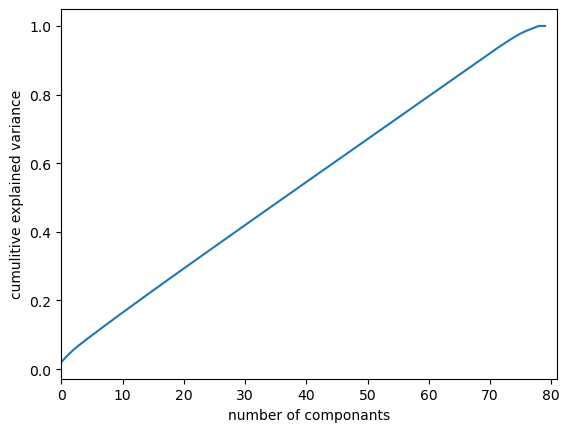

In [103]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X_Train = X_train.values
X_Train = np.asarray(X_Train)

X_std=StandardScaler().fit_transform(X_Train)
pca=PCA().fit(X_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,81,1)
plt.xlabel('number of componants')
plt.ylabel("cumulitive explained variance")
plt.show()

Now we will scale the data

In [104]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [105]:
def scale(scaler, X,y):
    X_scaler = scaler
    X_scaler.fit(X=X, y=y)
    X_scaled= X_scaler.transform(X)
    y_scaler= scaler
    y_scaler.fit(y.values.reshape(-1,1))
    y_scaled = y_scaler.transform(y.values.reshape(-1,1))
    
    return X_scaled,y_scaled,X_scaler,y_scaler

In [106]:
X_scaled, y_scaled, X_scaler ,y_scaler = scale(MinMaxScaler(),X,y)
X_train_scaled, X_test_scaled, y_train_scaled,y_test_scaled = train_test_split(
            X_scaled, y_scaled, test_size=0.2,random_state=42)

In [107]:
from sklearn.metrics import mean_squared_error

def rmse_with_inv_transform(scaler, y_test,y_pred_scaled,model_name):
    y_predict=scaler.inverse_transform(y_pred_scaled.reshape(-1,1))
    
    rmse_error=mean_squared_error(y_test,y_predict[:,0],squared=False)
    print("error = "'{}'.format(rmse_error)+" in " + model_name)
    
    return rmse_error,y_predict

In [108]:
X_train.shape

(141656, 80)

In [109]:
train_df.shape

(177070, 82)

 We will apply 4 different feature set size i.e. full, 40,20,10 features(selected by gini importance) We will also use three different scalers i.e. standard, min-max, no scaler and we will use 6 algorithms which will give us 72 results and from them we will find our best solution

In [110]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.neural_network import MLPRegressor
from sklearn import tree
from sklearn import svm
from sklearn import neighbors
from sklearn import linear_model

In [111]:
train_df.head()

,total_items,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,actual_delivery,busy_dasher_ratio,category_afghan,category_african,category_alcohol,category_alcohol-plus-food,...,category_sushi,category_tapas,category_thai,category_turkish,category_vegan,category_vegetarian,category_vietnamese,percent_distinct_item_of_total,avg_price_per_item,price_range_of_items
0,4.0,21.0,446.0,861.0,3779.0,0.424242,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,860.25,682.0
1,1.0,2.0,446.0,690.0,4024.0,2.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1900.00,0.0
2,1.0,0.0,446.0,690.0,1781.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1900.00,0.0
3,6.0,2.0,446.0,289.0,3075.0,1.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.833333,1150.00,1200.0
4,3.0,9.0,446.0,650.0,2390.0,1.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1300.00,500.0


In [ ]:
train_df.columns

In [ ]:
train_df.shape

In [ ]:
X_train.shape

In [112]:
# lets create a custome function which will help us apply several regression tasks and calculate the error for each task

def make_regression(X_train,y_train,X_test,y_test,model,model_name,verbose=True):
    model.fit(X_train,y_train)
    y_predict=model.predict(X_train)
    train_error=mean_squared_error(y_train,y_predict,squared=False)
    y_predict=model.predict(X_test)
    test_error=mean_squared_error(y_test,y_predict,squared=False)
    if verbose:
        print("train error = {}".format(train_error) + " in " + model_name)
        print("test error = {}".format(test_error) + " in " + model_name)


    trained_model = model
    
    return trained_model, y_predict,train_error,test_error

In [118]:
pred_dict = {
    "regression_model": [],
    "feature_set": [],
    "scaler_name": [],
    "RMSE": []
}

regression_models= {
    "Ridge": linear_model.Ridge(),
    "DecisionTree": tree.DecisionTreeRegressor(max_depth=6),
    "RandomForest": RandomForestRegressor(),
    "XGBoost": XGBRegressor(),
    "LGBM": LGBMRegressor(),
    "MLP": MLPRegressor()
}

feature_sets= {
    "full dataset" : X.columns.to_list(),
    "selected_features_40" : importances.sort_values(by='Gini-importance')[-40:].index.tolist(),
    "selected_features_20" : importances.sort_values(by='Gini-importance')[-20:].index.tolist(),
    "selected_features_10" : importances.sort_values(by='Gini-importance')[-10:].index.tolist(),
}

scalers= {
    "standard scaler": StandardScaler(),
    "MinMax Scaler": MinMaxScaler(),
    "NotScale":None,
}

#examin the error for each combination
for feature_set_name in feature_sets.keys():
    feature_set = feature_sets[feature_set_name]
    for scaler_name in scalers.keys():
        print(f"----------scaled with {scaler_name}-------- included columns are {feature_set_name}")
        print("")
        for model_name in regression_models.keys():
            if scaler_name == "NotScale":
                X=train_df[feature_set]
                y=train_df['actual_delivery']
                X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2,random_state=42)
                make_regression(X_train,y_train,X_test,y_test,regression_models[model_name],model_name,verbose=True)
            else:
                X_scaled,y_scaled,X_scaler,y_scaler=scale(scalers[scaler_name],X[feature_set],y)
                X_train_scaled,X_test_scaled,y_train_scaled,y_test_scaled=train_test_split(
                  X_scaled,y_scaled,test_size=0.2,random_state=42)
                _,y_predict_scaled,_,_ =make_regression(X_train_scaled,y_train_scaled[:,0],X_test_scaled,y_test_scaled,regression_models[model_name], model_name, verbose=True)
                rmse_error,y_predict=rmse_with_inv_transform(y_scaler,y_test,y_predict_scaled,model_name)
            pred_dict["regression_model"].append(model_name)
            pred_dict["feature_set"].append(feature_set_name)
            pred_dict["scaler_name"].append(scaler_name)
            pred_dict["RMSE"].append(rmse_error)

----------scaled with standard scaler-------- included columns are full dataset

train error = 0.767963171005249 in Ridge
test error = 1.4719302654266357 in Ridge
error = 2053.69873046875 in Ridge
train error = 0.7653021361303404 in DecisionTree
test error = 1.4744739559914226 in DecisionTree
error = 2057.2476687088733 in DecisionTree
train error = 0.2859746023179766 in RandomForest
test error = 1.4680735447191509 in RandomForest
error = 2048.3175471712343 in RandomForest
train error = 0.6924042105674744 in XGBoost
test error = 1.4594244956970215 in XGBoost
error = 2036.2498779296875 in XGBoost
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.036000 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1537
[LightGBM] [Info] Number of data points in the train set: 141656, number of used features: 70
[LightGBM] [Info] Start training from sco

C:\Users\HP\conda\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.42532e-11): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


train error = 1071.4971923828125 in Ridge
test error = 2053.692626953125 in Ridge
train error = 1067.7815291116704 in DecisionTree
test error = 2057.2476684096064 in DecisionTree
train error = 399.82756477223984 in RandomForest
test error = 2047.094057106753 in RandomForest
train error = 968.2471313476562 in XGBoost
test error = 2036.43212890625 in XGBoost
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007200 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1472
[LightGBM] [Info] Number of data points in the train set: 141656, number of used features: 70
[LightGBM] [Info] Start training from score 2851.342096
train error = 1017.5549840201221 in LGBM
test error = 2034.461097275308 in LGBM
train error = 1057.826416015625 in MLP
test error = 2047.7041015625 in MLP
----------scaled with standard scaler-------- included columns are selected_features_40

train error = 0.7685800194740295 in Ridge
test e

C:\Users\HP\conda\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.55922e-09): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


train error = 1072.35498046875 in Ridge
test error = 2054.00439453125 in Ridge
train error = 1067.785563647774 in DecisionTree
test error = 2056.529202224364 in DecisionTree
train error = 396.0386865920009 in RandomForest
test error = 2048.1672962010457 in RandomForest
train error = 965.6858520507812 in XGBoost
test error = 2035.7642822265625 in XGBoost
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012335 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1412
[LightGBM] [Info] Number of data points in the train set: 141656, number of used features: 40
[LightGBM] [Info] Start training from score 2851.342096
train error = 1017.1430421117441 in LGBM
test error = 2034.8058530174258 in LGBM


C:\Users\HP\conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


train error = 1058.941650390625 in MLP
test error = 2050.62548828125 in MLP
----------scaled with standard scaler-------- included columns are selected_features_20

train error = 0.770122230052948 in Ridge
test error = 1.4731249809265137 in Ridge
error = 2055.36572265625 in Ridge
train error = 0.7662722630951128 in DecisionTree
test error = 1.4725837048094073 in DecisionTree
error = 2054.610311207463 in DecisionTree
train error = 0.2845690752454542 in RandomForest
test error = 1.468330043577357 in RandomForest
error = 2048.675425052415 in RandomForest
train error = 0.6905712485313416 in XGBoost
test error = 1.4604161977767944 in XGBoost
error = 2037.6336669921875 in XGBoost
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015609 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1387
[LightGBM] [Info] Number of data points in the train set: 141656, number of used features: 20
[LightGBM] [Info] Start 

C:\Users\HP\conda\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.43857e-08): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


train error = 1069.1350906055598 in DecisionTree
test error = 2054.610311170708 in DecisionTree
train error = 397.4650546792759 in RandomForest
test error = 2048.3950619636266 in RandomForest
train error = 966.1651000976562 in XGBoost
test error = 2036.249267578125 in XGBoost
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005611 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1372
[LightGBM] [Info] Number of data points in the train set: 141656, number of used features: 20
[LightGBM] [Info] Start training from score 2851.342096
train error = 1018.9600610110249 in LGBM
test error = 2035.9494403356318 in LGBM


C:\Users\HP\conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


train error = 1055.9632568359375 in MLP
test error = 2048.46142578125 in MLP
----------scaled with standard scaler-------- included columns are selected_features_10

train error = 0.7717142105102539 in Ridge
test error = 1.4739872217178345 in Ridge
error = 2056.568359375 in Ridge
train error = 0.7663420076820632 in DecisionTree
test error = 1.4725742906448305 in DecisionTree
error = 2054.5971761770547 in DecisionTree
train error = 0.2884815147228754 in RandomForest
test error = 1.4720595259935643 in RandomForest
error = 2053.878954869036 in RandomForest
train error = 0.6992177963256836 in XGBoost
test error = 1.4623059034347534 in XGBoost
error = 2040.27001953125 in XGBoost
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015409 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1357
[LightGBM] [Info] Number of data points in the train set: 141656, number of used features: 10
[LightGBM] [Info] Start 

In [120]:
pred_df=pd.DataFrame(pred_dict)
pred_df

,regression_model,feature_set,scaler_name,RMSE
0,Ridge,full dataset,standard scaler,2053.698730
1,DecisionTree,full dataset,standard scaler,2057.247669
2,RandomForest,full dataset,standard scaler,2048.317547
3,XGBoost,full dataset,standard scaler,2036.249878
4,LGBM,full dataset,standard scaler,2033.435581
...,...,...,...,...
67,DecisionTree,selected_features_10,NotScale,2071.162842
68,RandomForest,selected_features_10,NotScale,2071.162842
69,XGBoost,selected_features_10,NotScale,2071.162842
70,LGBM,selected_features_10,NotScale,2071.162842


Lets first predict prep_duration and then calculate actual_total_delivery_duration

<Axes: >

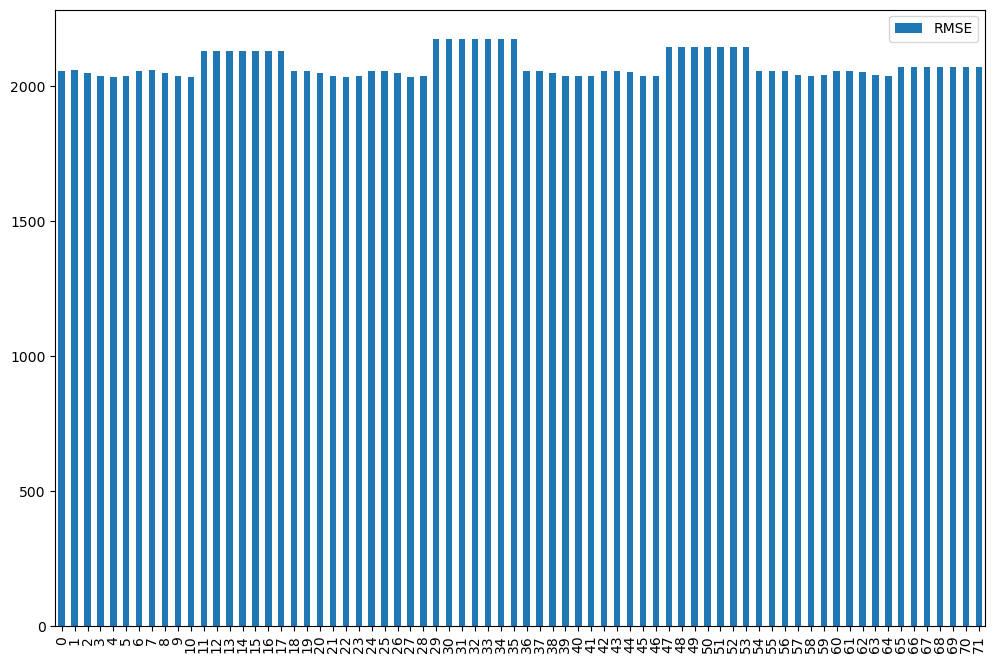

In [121]:
pred_df.plot(kind='bar',figsize=(12,8))

let's change the problem, predict prep_duration and then calculate actual_total_delivery_duration

In [122]:
train_df['prep_dur']=train_df['actual_delivery']-train_df['estimated_store_to_consumer_driving_duration']-train_df['estimated_order_place_duration']

In [123]:
scalers= {
     "Standard scaler": StandardScaler(),
}

feature_sets = {
    "selected_features_40" : importances.sort_values(by='Gini-importance')[-40:].index.tolist(),
}

In [124]:
for feature_set_name in feature_sets.keys():
    feature_set = feature_sets[feature_set_name]
    for scaler_name in scalers.keys():
        print(f"----------scaled with {scaler_name}-------- included columns are {feature_set_name}")
        print("")
        for model_name in regression_models.keys():
            #drop estimated store_to_consumer_driving_duration and estimated_order_place_duration
            X=train_df[feature_set].drop(columns=['estimated_store_to_consumer_driving_duration','estimated_order_place_duration'])
            y=train_df['prep_dur']
            
            # to get indices
            X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2,random_state=42)
            train_indices=X_train.index
            test_indices=X_test.index
                
            #scale
            X_scaled,y_scaled,X_scaler,y_scaler=scale(scalers[scaler_name],X,y)
                
            #apply indexing    
            X_train_scaled,X_test_scaled,y_train_scaled,y_test_scaled=train_test_split(
            X_scaled,y_scaled,test_size=0.2,random_state=42)
            _,y_predict_scaled,_,_ =make_regression(X_train_scaled,y_train_scaled[:,0],X_test_scaled,y_test_scaled[:,0],regression_models[model_name], model_name, verbose=True)
            rmse_error,y_predict=rmse_with_inv_transform(y_scaler,y_test,y_predict_scaled,model_name)
            pred_dict["regression_model"].append(model_name)
            pred_dict["feature_set"].append(feature_set_name)
            pred_dict["scaler_name"].append(scaler_name)
            pred_dict["RMSE"].append(rmse_error)

----------scaled with Standard scaler-------- included columns are selected_features_40

train error = 0.786737859249115 in Ridge
test error = 1.5045511722564697 in Ridge
error = 2055.40771484375 in Ridge
train error = 0.7693331400114065 in DecisionTree
test error = 1.5103578588350464 in DecisionTree
error = 2063.3402827182467 in DecisionTree
train error = 0.29438718604974584 in RandomForest
test error = 1.4946073524408072 in RandomForest
error = 2041.8230934681326 in RandomForest
train error = 0.7115257978439331 in XGBoost
test error = 1.4916772842407227 in XGBoost
error = 2037.8203125 in XGBoost
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.028394 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1163
[LightGBM] [Info] Number of data points in the train set: 141656, number of used features: 38
[LightGBM] [Info] Start training from 

In [125]:
len(importances.sort_values(by='Gini-importance')[-40:].index.tolist())

40

In [126]:
scalers= {
     "Standard scaler": StandardScaler(),
}

feature_sets = {
    "selected_features_40" : importances.sort_values(by='Gini-importance')[-40:].index.tolist(),
}

regression_models= {
    "LGBM": LGBMRegressor(),
}


for feature_set_name in feature_sets.keys():
    feature_set = feature_sets[feature_set_name]
    for scaler_name in scalers.keys():
        print(f"----------scaled with {scaler_name}-------- included columns are {feature_set_name}")
        print("")
        for model_name in regression_models.keys():
            X=train_df[feature_set]
            y=train_df['prep_dur']
            X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2,random_state=42)
            train_indices=X_train.index
            test_indices=X_test.index
                
               
            X_scaled,y_scaled,X_scaler,y_scaler=scale(scalers[scaler_name],X,y)
                
            X_train_scaled,X_test_scaled,y_train_scaled,y_test_scaled=train_test_split(
            X_scaled,y_scaled,test_size=0.2,random_state=42)
            _,y_predict_scaled,_,_ =make_regression(X_train_scaled,y_train_scaled,X_test_scaled,y_test_scaled,regression_models[model_name], model_name, verbose=True)
            rmse_error,y_predict=rmse_with_inv_transform(y_scaler,y_test,y_predict_scaled,model_name)
            pred_dict["regression_model"].append(model_name)
            pred_dict["feature_set"].append(feature_set_name)
            pred_dict["scaler_name"].append(scaler_name)
            pred_dict["RMSE"].append(rmse_error)

----------scaled with Standard scaler-------- included columns are selected_features_40



C:\Users\HP\conda\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.028349 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1447
[LightGBM] [Info] Number of data points in the train set: 141656, number of used features: 40
[LightGBM] [Info] Start training from score -0.002301
train error = 0.7452582822653055 in LGBM
test error = 1.4885753587342487 in LGBM
error = 2033.5826242762757 in LGBM


let's choose the best performing model and extract the prep_duration prediction

In [127]:
pred_values_dict={
    "delivery_duration": train_df['actual_delivery'][test_indices].values.tolist(),
    "prep_duration_prediction": y_predict[:,0].tolist(),
    "estimated_store_to_consumer_driving_duration": train_df['estimated_store_to_consumer_driving_duration'][test_indices].values.tolist(),
    "estimated_order_place_duration": train_df['estimated_order_place_duration'][test_indices].values.tolist(),
}

In [129]:
values_df=pd.DataFrame.from_dict(pred_values_dict)
values_df

,delivery_duration,prep_duration_prediction,estimated_store_to_consumer_driving_duration,estimated_order_place_duration
0,2448.0,1718.073033,380.0,251.0
1,1839.0,1573.661500,747.0,446.0
2,1927.0,2049.556749,543.0,251.0
3,2657.0,1294.531543,445.0,251.0
4,3596.0,1977.600699,691.0,446.0
...,...,...,...,...
35409,9557.0,2756.293948,768.0,446.0
35410,1864.0,2107.270008,324.0,446.0
35411,2674.0,1885.087235,791.0,251.0
35412,2234.0,1928.748680,687.0,251.0


In [130]:
values_df['sum_total_delivery_duration']=values_df['prep_duration_prediction']+values_df['estimated_store_to_consumer_driving_duration']+values_df['estimated_order_place_duration']
values_df

,delivery_duration,prep_duration_prediction,estimated_store_to_consumer_driving_duration,estimated_order_place_duration,sum_total_delivery_duration
0,2448.0,1718.073033,380.0,251.0,2349.073033
1,1839.0,1573.661500,747.0,446.0,2766.661500
2,1927.0,2049.556749,543.0,251.0,2843.556749
3,2657.0,1294.531543,445.0,251.0,1990.531543
4,3596.0,1977.600699,691.0,446.0,3114.600699
...,...,...,...,...,...
35409,9557.0,2756.293948,768.0,446.0,3970.293948
35410,1864.0,2107.270008,324.0,446.0,2877.270008
35411,2674.0,1885.087235,791.0,251.0,2927.087235
35412,2234.0,1928.748680,687.0,251.0,2866.748680


In [133]:
mean_squared_error(values_df['delivery_duration'],values_df['sum_total_delivery_duration'],squared=False)

2033.5826242762757

let's change our features

In [134]:
X=values_df[["prep_duration_prediction",'estimated_store_to_consumer_driving_duration','estimated_order_place_duration']]
y=values_df['delivery_duration']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [140]:
regression_models= {
    "LinearReg" : linear_model.LinearRegression(),
    "Ridge": linear_model.Ridge(),
    "DecisionTree": tree.DecisionTreeRegressor(max_depth=6),
    "RandomForest": RandomForestRegressor(),
    "XGBoost": XGBRegressor(),
    "LGBM": LGBMRegressor(),
    "MLP": MLPRegressor()
}

for model_name in regression_models.keys():
    _,y_predict,_,_=make_regression(
        X_train, y_train, X_test, y_test, regression_models[model_name], model_name, verbose=False)
    print("RMSE Of :", model_name, mean_squared_error(y_test,y_predict,squared=False))

RMSE Of : LinearReg 983.5453075865386
RMSE Of : Ridge 983.5453075892314
RMSE Of : DecisionTree 995.0998968419965
RMSE Of : RandomForest 1072.8090746670725
RMSE Of : XGBoost 1058.0556350233915
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000403 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 519
[LightGBM] [Info] Number of data points in the train set: 28331, number of used features: 3
[LightGBM] [Info] Start training from score 2869.174261
RMSE Of : LGBM 1063.2145024568936
RMSE Of : MLP 984.3310589990604
